<a href="https://colab.research.google.com/github/tomeliud/Times-Series-to-Predict-Teenage-Pregancies-in-Kenya--KNN-and-Random-Forest/blob/main/TW_Foundation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction 

In this google colaboratory we will analyze the nature of occurences of teenage pregnacies in Kenya. This will help draw insightful information thus coming up with findings, conclusions, and recommendations to help reduce teenange pregancy. Moreover, we will seek to identify vunerable communities which have been diversly affected by teenage pregnancies. 

> The dataset can be found here [[https://drive.google.com/drive/folders/1wu1L5fUuoBrhMtQFNBvwlbZqSElifTlN?usp=sharing]]



### Importing our libraries 

In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import datetime as dt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_color_codes(palette='pastel')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore') 

## Loading and Viewing our Dataset 

In [ ]:
#Reading our dataset 
df = pd.read_csv('Teenage Pregnancies Data 2016 to 2020_WardLevel_Quarterly.csv')

In [ ]:
#Viewing the top of our dataset 
df.head()

,periodid,periodname,periodcode,perioddescription,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescents (10-14 years) with pregnancy,adolescent family planning uptake 10-14 yrs,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy
0,2020Q1,Jan to Mar 2020,2020Q1,NaN,Kenya,Garissa County,Dadaab Sub County,Abakaile Ward,Mn7xPHjxcxb,Abakaile Ward,KE_Ward_151,NaN,7.0,4.0,NaN,2.9,NaN,NaN,NaN,4.0
1,2020Q1,Jan to Mar 2020,2020Q1,NaN,Kenya,Meru County,Imenti South Sub County,Abogeta East Ward,nDZvyhVwri1,Abogeta East Ward,KE_Ward_293,NaN,48.1,161.0,NaN,16.2,1.0,37.0,14.0,160.0
2,2020Q1,Jan to Mar 2020,2020Q1,NaN,Kenya,Meru County,Imenti South Sub County,Abogeta West Ward,auJK9sKTX9b,Abogeta West Ward,KE_Ward_294,NaN,42.6,20.0,NaN,666.7,3.0,3.0,23.0,17.0
3,2020Q1,Jan to Mar 2020,2020Q1,NaN,Kenya,Meru County,Imenti Central Sub County,Abothuguchi Central Ward,Ay0bToL5BTE,Abothuguchi Central Ward,KE_Ward_286,NaN,21.3,29.0,NaN,NaN,1.0,NaN,24.0,28.0
4,2020Q1,Jan to Mar 2020,2020Q1,NaN,Kenya,Meru County,Imenti Central Sub County,Abothuguchi West Ward,ZVoIw8oAOWZ,Abothuguchi West Ward,KE_Ward_287,NaN,11.3,34.0,NaN,NaN,1.0,NaN,7.0,33.0


In [ ]:
df.tail()#viewing the bottom of our dataset 

,periodid,periodname,periodcode,perioddescription,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,organisationunitid,organisationunitname,organisationunitcode,organisationunitdescription,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescents (10-14 years) with pregnancy,adolescent family planning uptake 10-14 yrs,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy
27719,2016Q4,Oct to Dec 2016,2016Q4,NaN,Kenya,Nairobi County,Roysambu Sub County,Zimmerman Ward,m3CPhYAMMRN,Zimmerman Ward,KE_Ward_1393,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN
27720,2016Q4,Oct to Dec 2016,2016Q4,NaN,Kenya,Mombasa County,Nyali Sub County,Ziwa La Ng'ombe Ward,XhBDUNeFqF6,Ziwa La Ng'ombe Ward,KE_Ward_17,NaN,7.3,4.0,NaN,2.6,NaN,NaN,28.0,4.0
27721,2016Q4,Oct to Dec 2016,2016Q4,NaN,Kenya,Uasin Gishu County,Soy Sub County,Ziwa Ward,DUsGbpnzvet,Ziwa Ward,KE_Ward_703,NaN,38.5,105.0,NaN,9.3,1.0,NaN,19.0,104.0
27722,2016Q4,Oct to Dec 2016,2016Q4,NaN,Kenya,Nairobi County,Starehe Sub County,Ziwani/Kariokor Ward,nRw6kIlJ23L,Ziwani/Kariokor Ward,KE_Ward_1442,NaN,18.6,8.0,NaN,6.5,NaN,NaN,3.0,8.0
27723,2016Q4,Oct to Dec 2016,2016Q4,NaN,Kenya,Kitui County,Kitui East Sub County,Zombe/Mwitika Ward,fgZAe9zffHF,Zombe/Mwitika Ward,KE_Ward_359,NaN,40.4,78.0,0.0,12.2,3.0,NaN,33.0,75.0


### Data Cleaning and Tydying 

In [ ]:
#Checking the nature and particulars of our columns 
for column in df.columns:
  print(column)
  print(df[column].nunique())
  print(df[column].unique())
  print("----------------------------------------------------------------")

periodid
20
['2020Q1' '2020Q2' '2020Q3' '2020Q4' '2019Q1' '2019Q2' '2019Q3' '2019Q4'
 '2018Q1' '2018Q2' '2018Q3' '2018Q4' '2017Q1' '2017Q2' '2017Q3' '2017Q4'
 '2016Q1' '2016Q2' '2016Q3' '2016Q4']
----------------------------------------------------------------
periodname
20
['Jan to Mar 2020' 'Apr to Jun 2020' 'Jul to Sep 2020' 'Oct to Dec 2020'
 'Jan to Mar 2019' 'Apr to Jun 2019' 'Jul to Sep 2019' 'Oct to Dec 2019'
 'Jan to Mar 2018' 'Apr to Jun 2018' 'Jul to Sep 2018' 'Oct to Dec 2018'
 'Jan to Mar 2017' 'Apr to Jun 2017' 'Jul to Sep 2017' 'Oct to Dec 2017'
 'Jan to Mar 2016' 'Apr to Jun 2016' 'Jul to Sep 2016' 'Oct to Dec 2016']
----------------------------------------------------------------
periodcode
20
['2020Q1' '2020Q2' '2020Q3' '2020Q4' '2019Q1' '2019Q2' '2019Q3' '2019Q4'
 '2018Q1' '2018Q2' '2018Q3' '2018Q4' '2017Q1' '2017Q2' '2017Q3' '2017Q4'
 '2016Q1' '2016Q2' '2016Q3' '2016Q4']
----------------------------------------------------------------
perioddescription
0
[nan]
-----

In [ ]:
#dropping columns with no data entered/collected 
df.drop(['perioddescription', 'organisationunitdescription'], 1, inplace=True)

In [ ]:
#checking for null/missing values 
df.isnull().any()

periodid                                          False
periodname                                        False
periodcode                                        False
orgunitlevel1                                     False
orgunitlevel2                                     False
orgunitlevel3                                     False
orgunitlevel4                                     False
organisationunitid                                False
organisationunitname                              False
organisationunitcode                              False
() of pregnant women adolescents (10-19 years)     True
adolescent pregnancy                               True
estimated post abortion                            True
prop of monthly anc visit by preg adolescent       True
adolescents (10-14 years) with  pregnancy          True
adolescent family planning uptake 10-14 yrs        True
adolescent family planning uptake 15-19 yrs        True
adolescents (15-19 years) with  pregnancy       

In [ ]:
#Checking for the total number of null values in the numerical columns 
df.isnull().sum(axis=0).sort_values(ascending=False)

adolescent family planning uptake 10-14 yrs       19566
adolescents (10-14 years) with  pregnancy         16269
estimated post abortion                            9348
adolescent family planning uptake 15-19 yrs        5613
adolescents (15-19 years) with  pregnancy          3878
prop of monthly anc visit by preg adolescent       2431
() of pregnant women adolescents (10-19 years)     1911
adolescent pregnancy                                  9
orgunitlevel2                                         0
periodname                                            0
periodcode                                            0
orgunitlevel1                                         0
organisationunitname                                  0
orgunitlevel3                                         0
orgunitlevel4                                         0
organisationunitid                                    0
organisationunitcode                                  0
periodid                                        

In [ ]:
#For better analysis we will split the period name column to have thier particulars i.e. months and year  as two seperate columns  
new = df.periodname.str.split(" ", expand=True)
new.columns = ['m1', 'm2', 'm3', 'year']
new['m2'] = new['m2'].replace("to", "-")
year = new['year']

n = (new['m1']+new['m2']+new['m3']).astype("object")
new = pd.concat([n, year], axis=1)\

new.columns = ['month_period', 'year']
new.head()

,month_period,year
0,Jan-Mar,2020
1,Jan-Mar,2020
2,Jan-Mar,2020
3,Jan-Mar,2020
4,Jan-Mar,2020


In [ ]:
#joining the new columns to our dataframe 
df = pd.concat([df, new],axis=1)

In [ ]:
#Since we do not need the period name column anymore we will drop that column
#We will also drop period id column since its a duplicate of period code 
df.drop(['periodid', 'periodname'], axis=1, inplace=True)

In [ ]:
#To deal with missing values we will first delete rows in 2020 where data was not collected i.e. 2020 quater 3 and 4 
periods=['Jul-Sep', 'Oct-Dec']

for period in periods:
  df = df.drop(df[(df.year == '2020') & (df.month_period == period)].index)

In [ ]:
#checking if the rows have been dropped 
df.shape

(25926, 18)

In [ ]:
#Checking for the total number of null values in the numerical columns after dropping rows without data collected 
df.isnull().sum(axis=0).sort_values(ascending=False)

adolescent family planning uptake 10-14 yrs       17768
adolescents (10-14 years) with  pregnancy         14471
estimated post abortion                            9348
adolescent family planning uptake 15-19 yrs        3815
adolescents (15-19 years) with  pregnancy          2080
prop of monthly anc visit by preg adolescent        633
() of pregnant women adolescents (10-19 years)      113
adolescent pregnancy                                  9
orgunitlevel4                                         0
orgunitlevel1                                         0
orgunitlevel2                                         0
orgunitlevel3                                         0
year                                                  0
organisationunitid                                    0
organisationunitname                                  0
organisationunitcode                                  0
month_period                                          0
periodcode                                      

In [ ]:
#Dealing with other missing values 
#Since we are forcusing more on teenage precgnacy we will delete some columns concerning familiy planning especially those with high number of null values  
#To deal with missing values of the adolescents between 10 -14 years we will subtract adolescents pregnancy between 15-19 with adolescents pregnancy
#we will also drop rows with missing values in adolescent family planning uptake 15-19 yrs
df.drop(['adolescent family planning uptake 10-14 yrs',
         'adolescents (10-14 years) with  pregnancy'], 1, inplace=True)
#we will first delete the adolescents (10-14 years) with  pregnancy column then later include it using the method explained above 
df = df[~df['adolescent family planning uptake 15-19 yrs'].isnull()]
df.isna().sum().sort_values(ascending=False)


estimated post abortion                           7970
prop of monthly anc visit by preg adolescent       324
adolescents (15-19 years) with  pregnancy          281
() of pregnant women adolescents (10-19 years)      33
adolescent pregnancy                                 9
year                                                 0
month_period                                         0
adolescent family planning uptake 15-19 yrs          0
organisationunitcode                                 0
organisationunitname                                 0
organisationunitid                                   0
orgunitlevel4                                        0
orgunitlevel3                                        0
orgunitlevel2                                        0
orgunitlevel1                                        0
periodcode                                           0
dtype: int64

In [ ]:
#we will deal with all the other null values by filling them with the mean 
df['() of pregnant women adolescents (10-19 years)'].fillna((df['() of pregnant women adolescents (10-19 years)'].mean()), inplace=True)
df['estimated post abortion'].fillna((df['estimated post abortion'].mean()), inplace=True)
df['adolescent pregnancy'].fillna((df['adolescent pregnancy'].mean()), inplace=True)
df['prop of monthly anc visit by preg adolescent'].fillna((df['prop of monthly anc visit by preg adolescent'].mean()), inplace=True)
df['adolescents (15-19 years) with  pregnancy'].fillna((df['adolescents (15-19 years) with  pregnancy'].mean()), inplace=True)
df.isna().any()

periodcode                                        False
orgunitlevel1                                     False
orgunitlevel2                                     False
orgunitlevel3                                     False
orgunitlevel4                                     False
organisationunitid                                False
organisationunitname                              False
organisationunitcode                              False
() of pregnant women adolescents (10-19 years)    False
adolescent pregnancy                              False
estimated post abortion                           False
prop of monthly anc visit by preg adolescent      False
adolescent family planning uptake 15-19 yrs       False
adolescents (15-19 years) with  pregnancy         False
month_period                                      False
year                                              False
dtype: bool

In [ ]:
#rounding off our numerical values to the nearest whole number 
df = df.round(decimals=0)

In [ ]:
#Checking for duplicates 
df.duplicated().any()#We have no duplicate values 

False

In [ ]:
#checking for unique values in each column 
df.nunique()

periodcode                                          18
orgunitlevel1                                        1
orgunitlevel2                                       47
orgunitlevel3                                      304
orgunitlevel4                                     1389
organisationunitid                                1431
organisationunitname                              1389
organisationunitcode                              1431
() of pregnant women adolescents (10-19 years)     169
adolescent pregnancy                               427
estimated post abortion                              5
prop of monthly anc visit by preg adolescent       407
adolescent family planning uptake 15-19 yrs        572
adolescents (15-19 years) with  pregnancy          399
month_period                                         4
year                                                 5
dtype: int64

In [ ]:
#engeering the column we deleted withou missing values 
df['adolescents (10-14 years) with  pregnancy'] = df['adolescent pregnancy'] - df['adolescents (15-19 years) with  pregnancy']
#df['abortions'] = np.round((df['adolescent pregnancy'] * df['estimated post abortion']), 0)
df.head(3)

,periodcode,orgunitlevel1,orgunitlevel2,orgunitlevel3,orgunitlevel4,organisationunitid,organisationunitname,organisationunitcode,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,month_period,year,adolescents (10-14 years) with pregnancy
1,2020Q1,Kenya,Meru County,Imenti South Sub County,Abogeta East Ward,nDZvyhVwri1,Abogeta East Ward,KE_Ward_293,48.0,161.0,0.0,16.0,14.0,160.0,Jan-Mar,2020,1.0
2,2020Q1,Kenya,Meru County,Imenti South Sub County,Abogeta West Ward,auJK9sKTX9b,Abogeta West Ward,KE_Ward_294,43.0,20.0,0.0,667.0,23.0,17.0,Jan-Mar,2020,3.0
3,2020Q1,Kenya,Meru County,Imenti Central Sub County,Abothuguchi Central Ward,Ay0bToL5BTE,Abothuguchi Central Ward,KE_Ward_286,21.0,29.0,0.0,26.0,24.0,28.0,Jan-Mar,2020,1.0


In [ ]:
#Checking the size of our dataset 
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 22111 rows and 17 columns


In [ ]:
#comparison of the new dataframe versus the previous dataframe 
new.shape, df.shape

((27724, 2), (22111, 17))

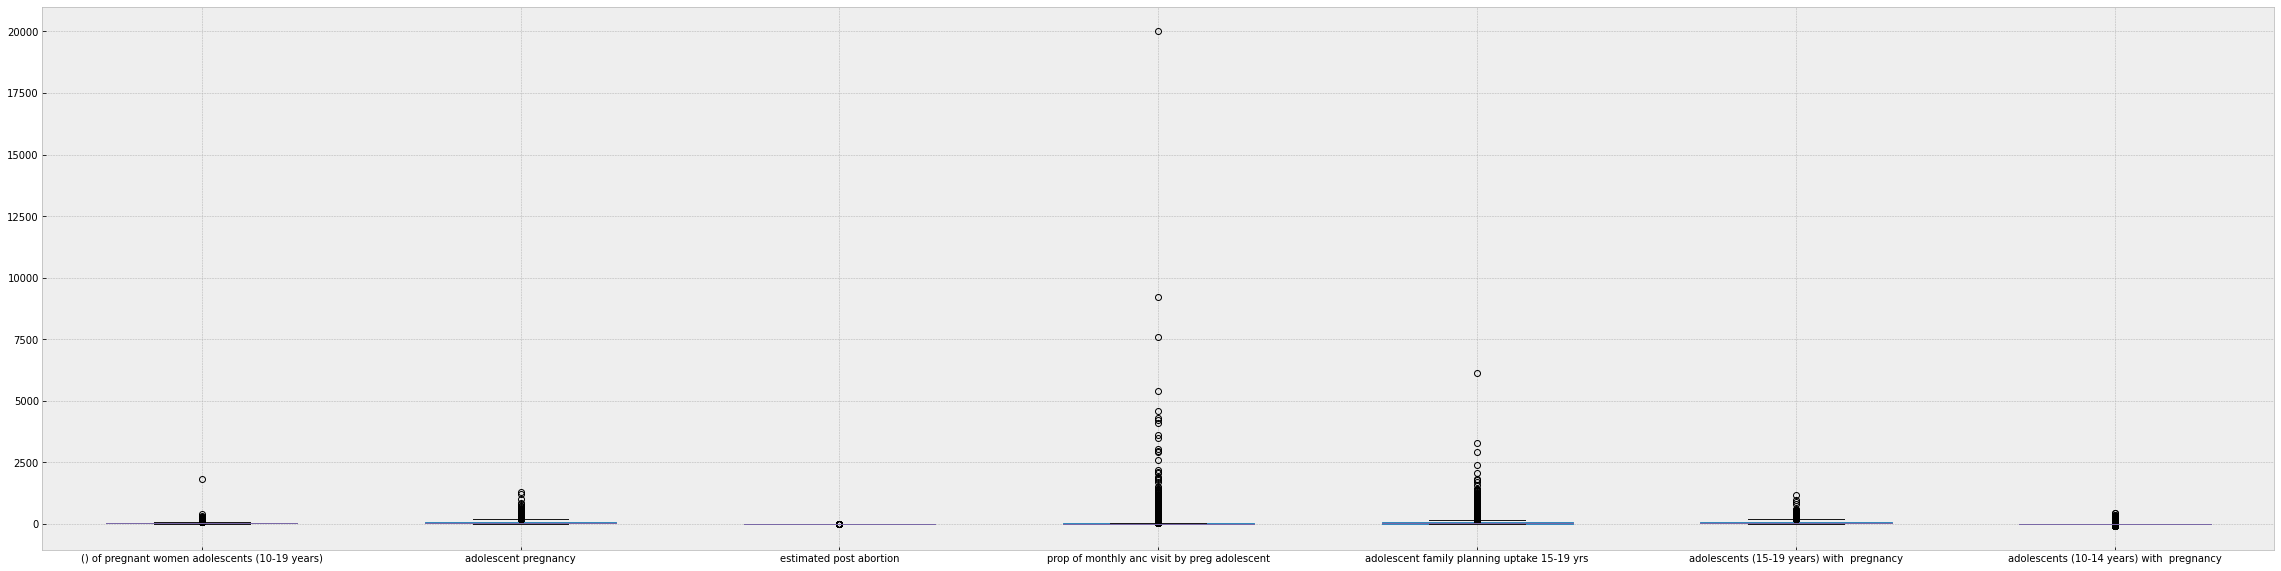

In [ ]:
# finding outliers within the dataset.
# using the numerical columns.
# in statistics, an outlier is an observation point that is distant from other observations.
plt.style.use('bmh')
plt.figure(figsize=(40,10))
num = df.select_dtypes("float64")
_t, df_outliers = pd.DataFrame.boxplot(num, return_type="both", widths=0.6)
outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]
boxes = [box.get_ydata() for box in df_outliers["boxes"]]
whiskers = [whiskers.get_ydata() for whiskers in df_outliers["whiskers"]]

We will not drop outliers since we do not want to loss important data from the dataset that might be influencial in our analysis 

---



In [ ]:
#Renaming columns for easier understanding 
df = df.rename({'orgunitlevel1' : 'Country', 'orgunitlevel2' : 'County', 'orgunitlevel3' : 'Sub_County', 'orgunitlevel4' : 'Ward' }, axis =1 )


In [ ]:
#Saving our cleaned dataset for further analysis using tableau 
df.to_csv("Teenage Pregnacies between 2016-2020 cleaned Dataset.csv")

In [ ]:
df.head()

,periodcode,Country,County,Sub_County,Ward,organisationunitid,organisationunitname,organisationunitcode,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,month_period,year,adolescents (10-14 years) with pregnancy
1,2020Q1,Kenya,Meru County,Imenti South Sub County,Abogeta East Ward,nDZvyhVwri1,Abogeta East Ward,KE_Ward_293,48.0,161.0,0.0,16.0,14.0,160.0,Jan-Mar,2020,1.0
2,2020Q1,Kenya,Meru County,Imenti South Sub County,Abogeta West Ward,auJK9sKTX9b,Abogeta West Ward,KE_Ward_294,43.0,20.0,0.0,667.0,23.0,17.0,Jan-Mar,2020,3.0
3,2020Q1,Kenya,Meru County,Imenti Central Sub County,Abothuguchi Central Ward,Ay0bToL5BTE,Abothuguchi Central Ward,KE_Ward_286,21.0,29.0,0.0,26.0,24.0,28.0,Jan-Mar,2020,1.0
4,2020Q1,Kenya,Meru County,Imenti Central Sub County,Abothuguchi West Ward,ZVoIw8oAOWZ,Abothuguchi West Ward,KE_Ward_287,11.0,34.0,0.0,26.0,7.0,33.0,Jan-Mar,2020,1.0
6,2020Q1,Kenya,Kilifi County,Magarini Sub County,Adu Ward,EO3kbx8nZIp,Adu Ward,KE_Ward_83,20.0,136.0,0.0,10.0,87.0,128.0,Jan-Mar,2020,8.0


## Exploratory Data Analysis

### Univariate Analysis 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

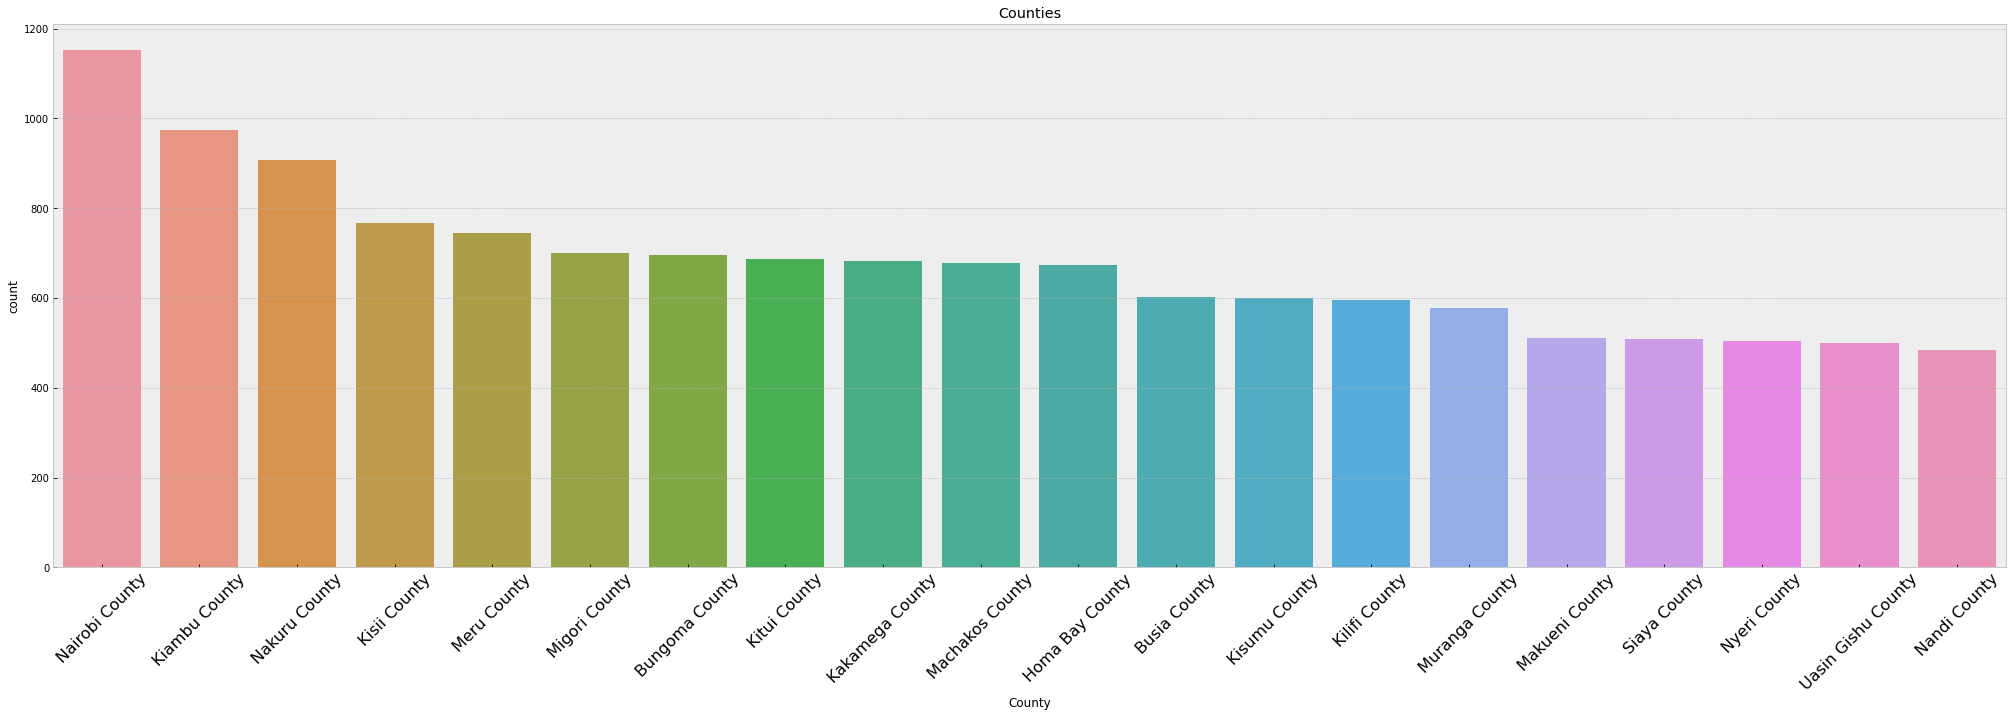

In [ ]:
#Finding the top 20 most affected counties over the 5 years 
plt.figure(figsize=(35,10))
sns.countplot(df['County'],order=df['County'].value_counts().iloc[:20].index)
plt.title('Counties')
plt.xticks(fontsize=16,rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

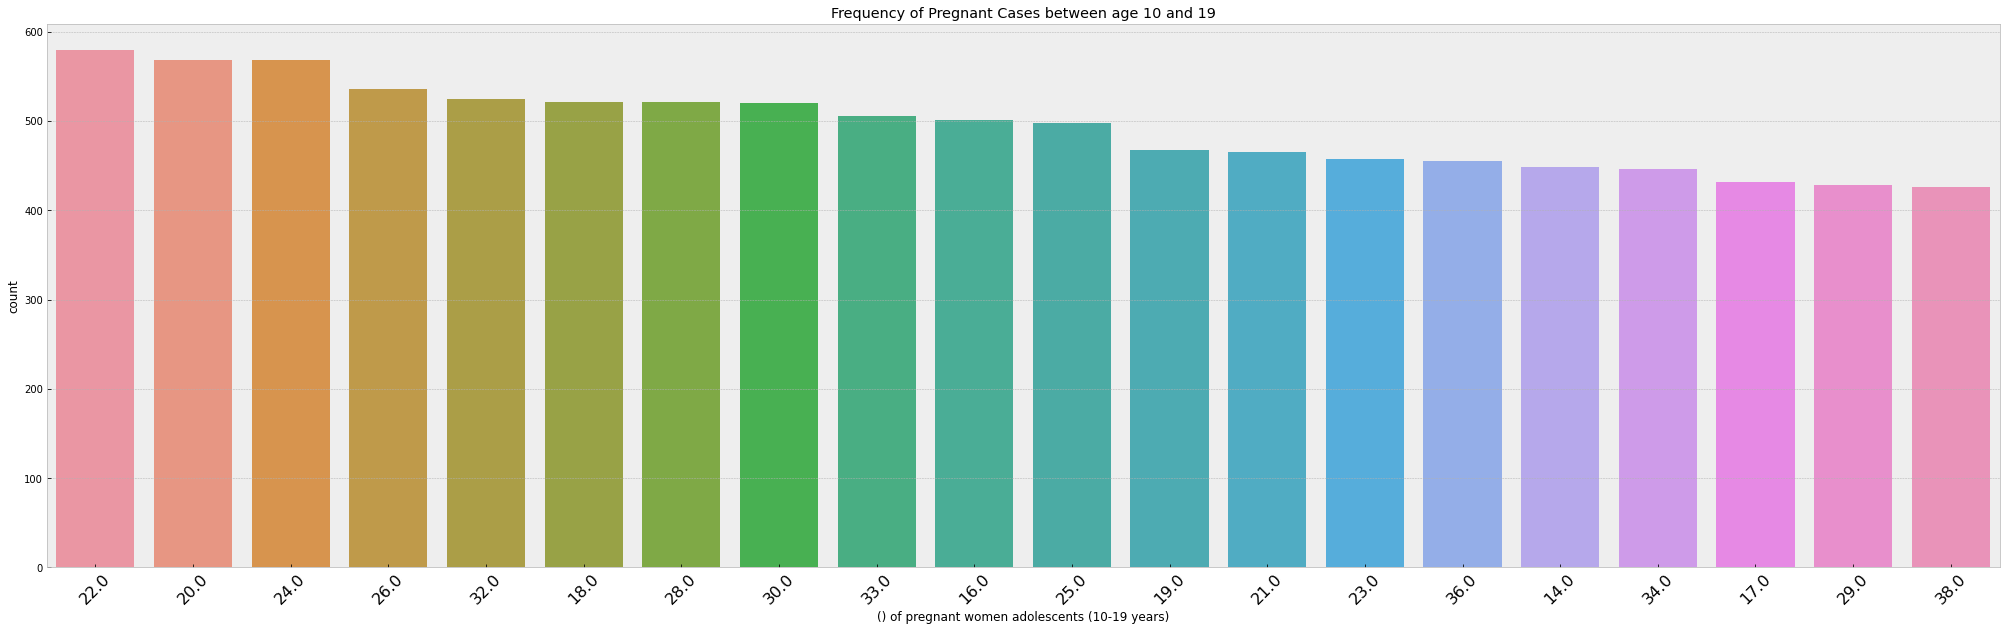

In [ ]:
plt.figure(figsize=(35,10))
sns.countplot(df['() of pregnant women adolescents (10-19 years)'],order=df['() of pregnant women adolescents (10-19 years)'].value_counts().iloc[:20].index)
plt.title('Frequency of Pregnant Cases between age 10 and 19')
plt.xticks(fontsize=16,rotation=45)

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

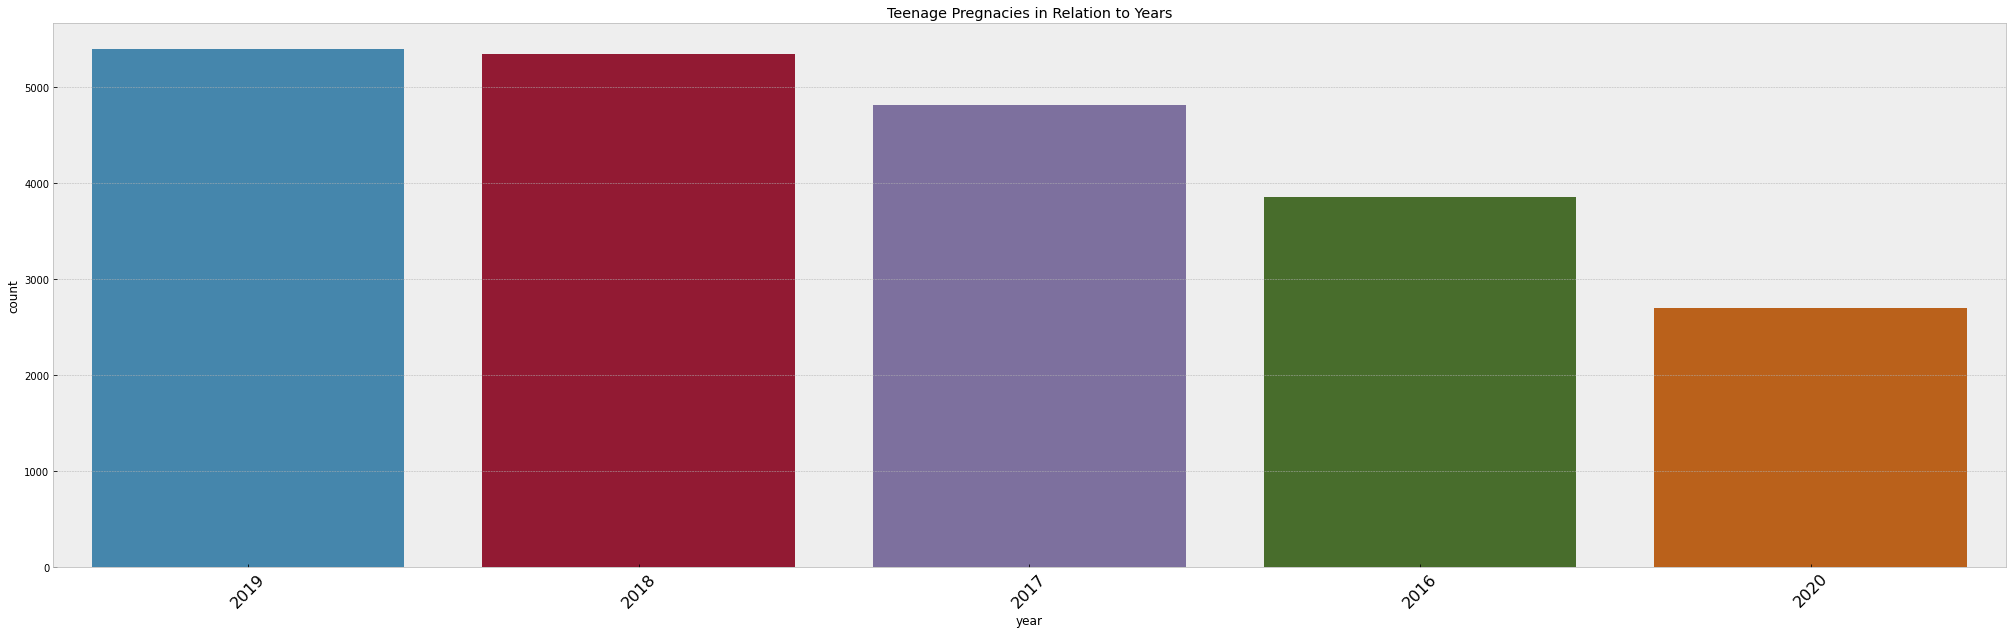

In [ ]:
#Finding the year with the most reported cases of teenage pregancies 
plt.figure(figsize=(35,10))
sns.countplot(df['year'],order=df['year'].value_counts().index)
plt.title('Teenage Pregnacies in Relation to Years')
plt.xticks(fontsize=16,rotation=45)

Considering we have half of the year records of 2020 it is most likely that teenage pregancies have continued to increase over the years  

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

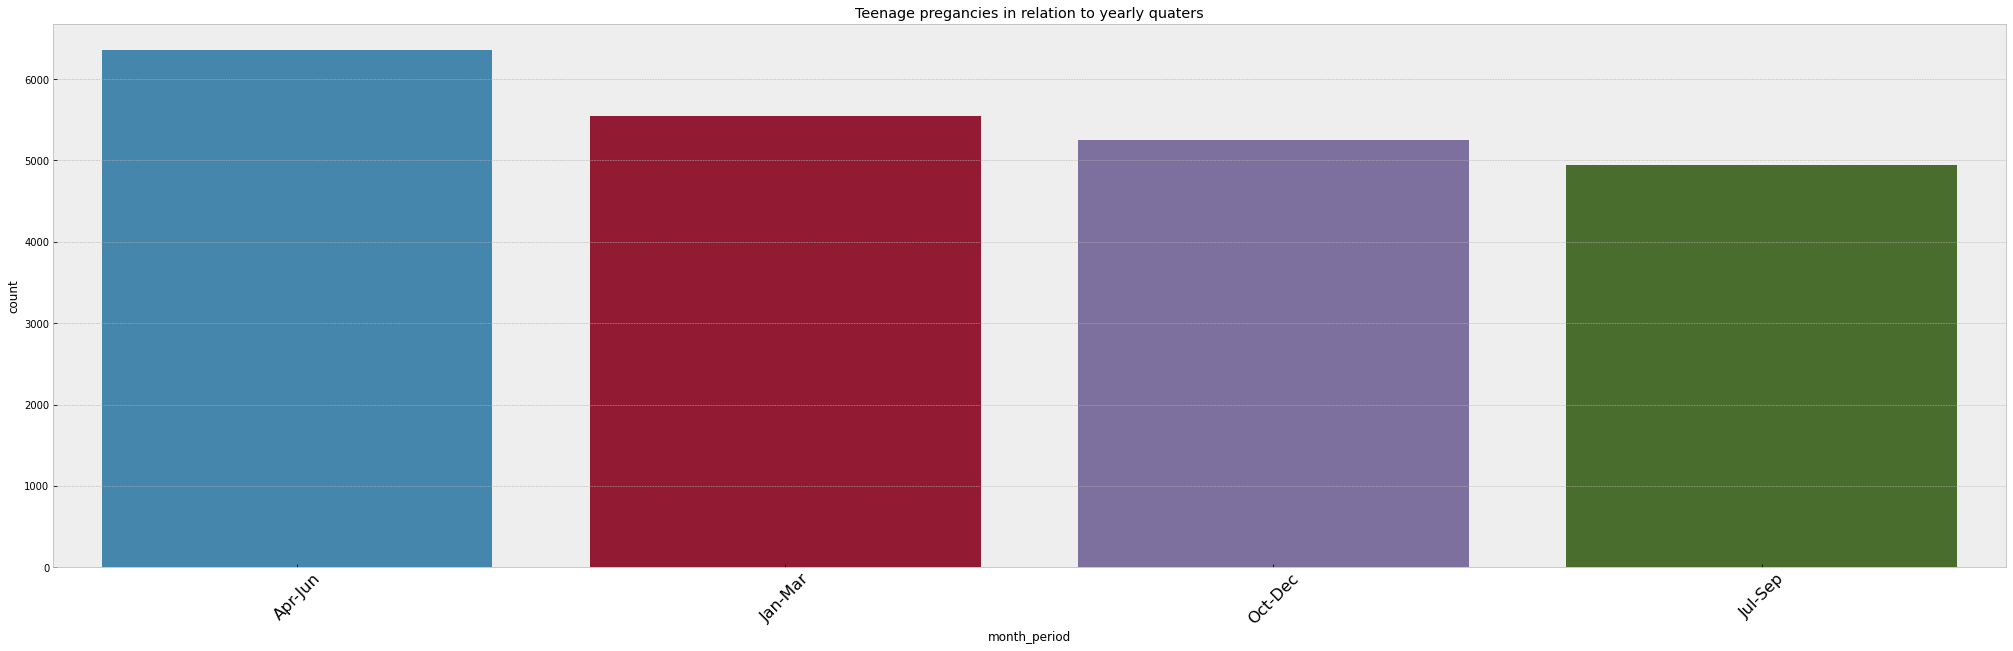

In [ ]:
#Yearly quater preiod that recorded the most number of cases 
plt.figure(figsize=(35,10))
sns.countplot(df['month_period'],order=df['month_period'].value_counts().index)
plt.title('Teenage pregancies in relation to yearly quaters')
plt.xticks(fontsize=16,rotation=45)

Apr - Jun recorded the highest number of pregancy cases with more than 6000 cases 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

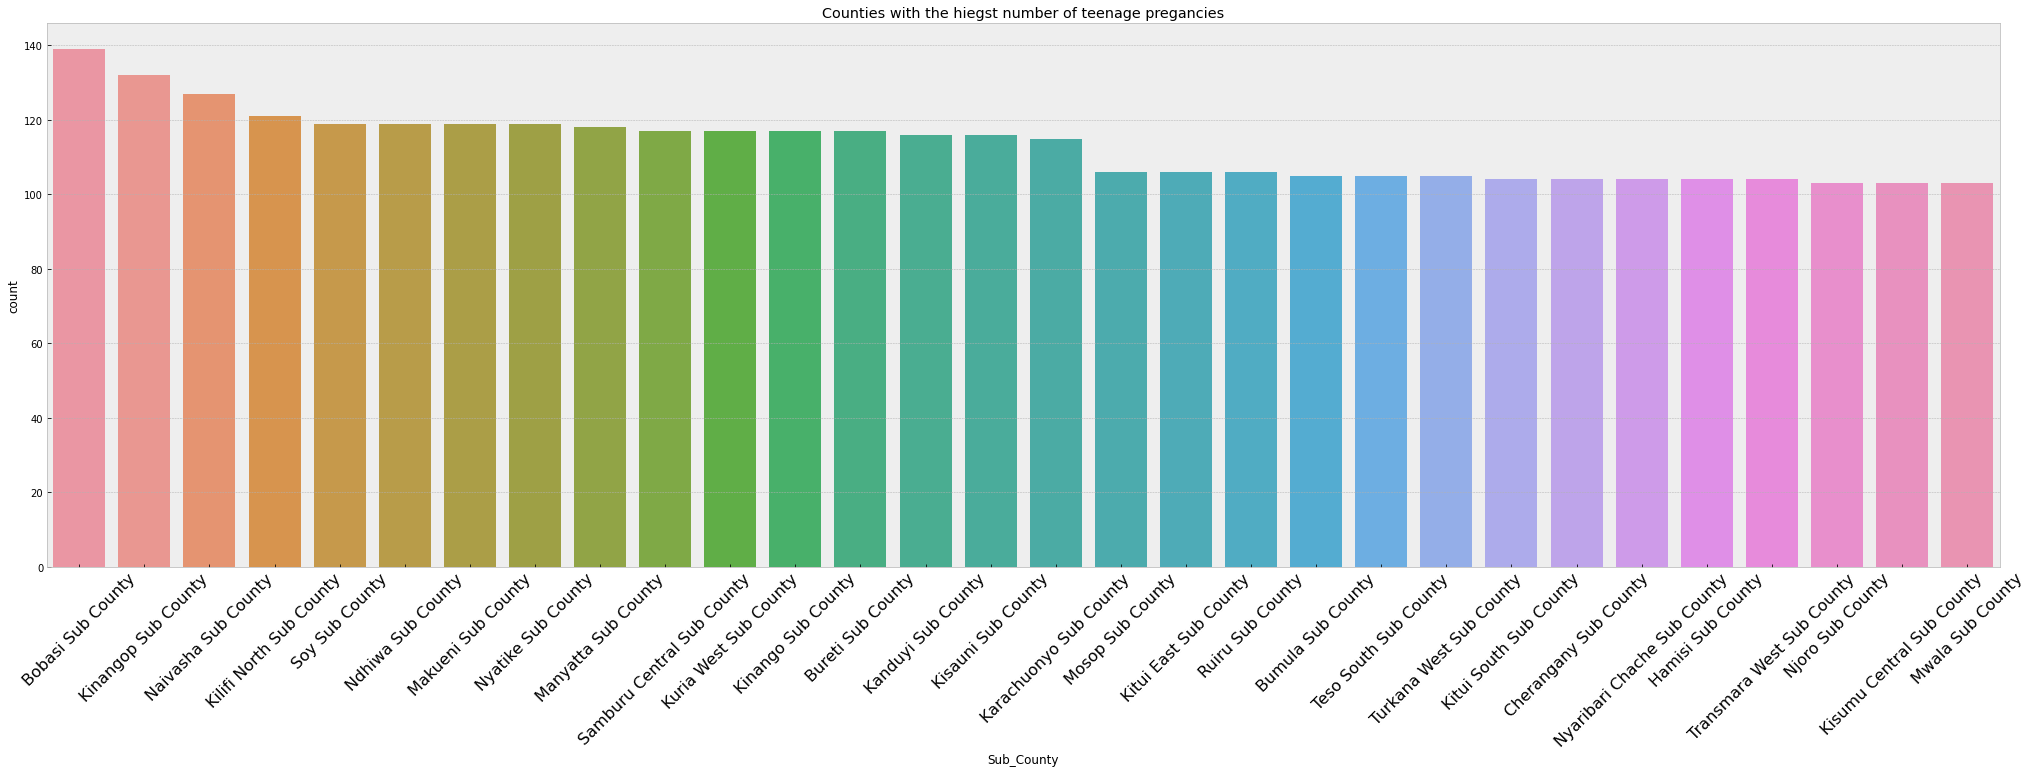

In [ ]:
#Subcounties with the higest number of teengage pregancies 
#top 30 subcounties 
plt.figure(figsize=(35,10))
sns.countplot(df['Sub_County'],order=df['Sub_County'].value_counts().iloc[:30].index)
plt.title('Counties with the hiegst number of teenage pregancies')
plt.xticks(fontsize=16,rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

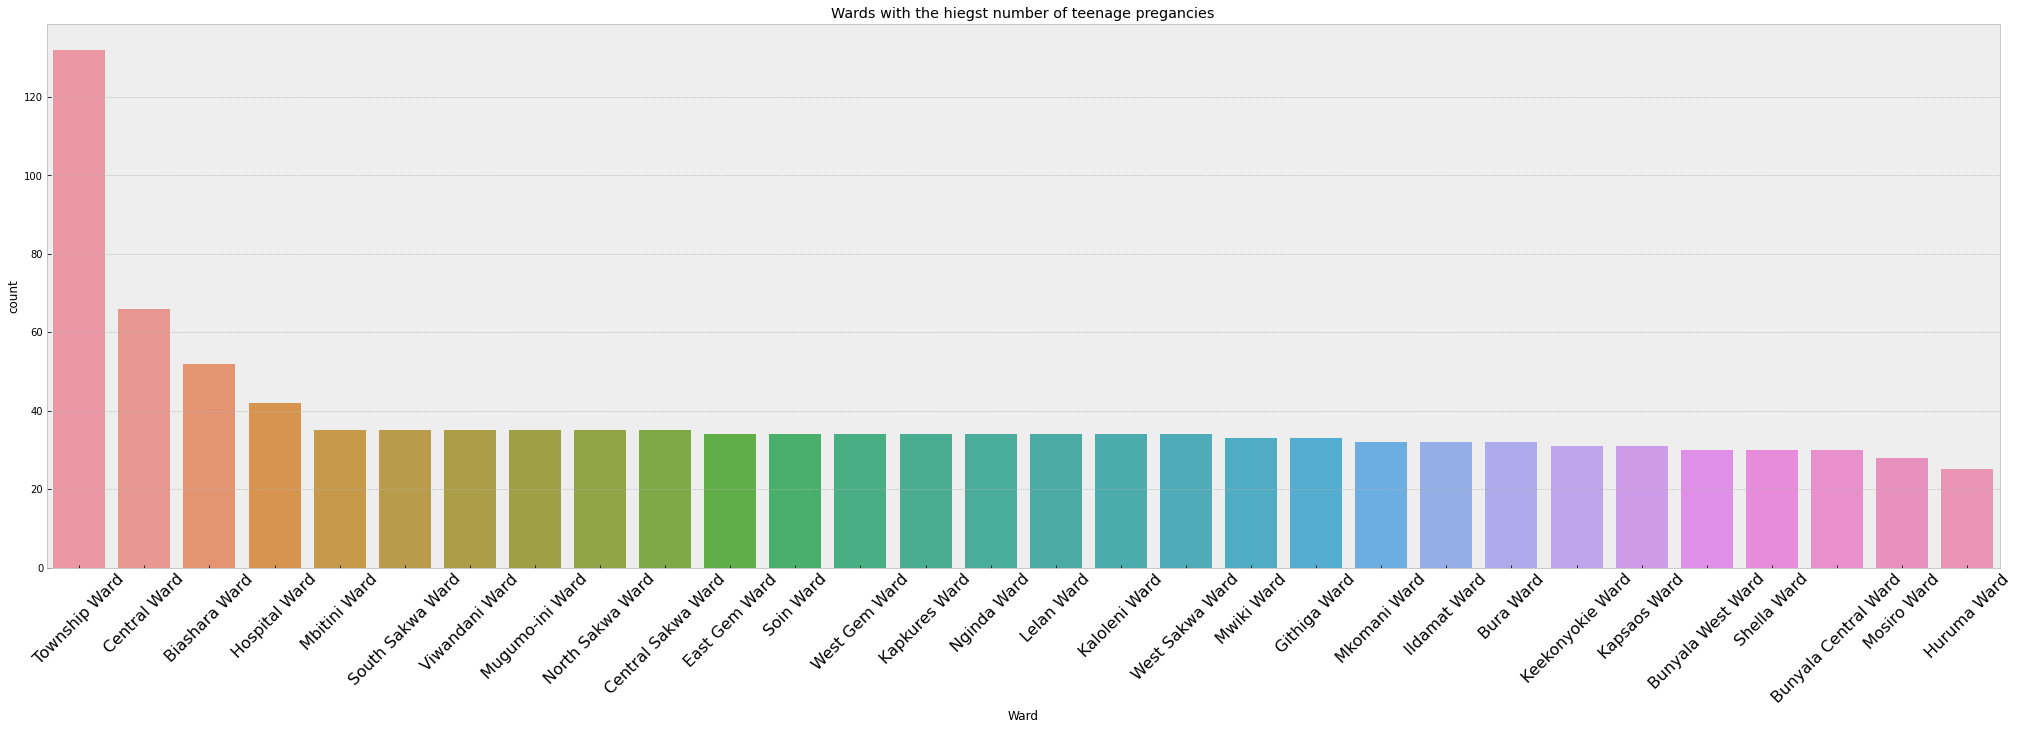

In [ ]:
#top 30 wards in teenage pregnancies 
plt.figure(figsize=(35,10))
sns.countplot(df['Ward'],order=df['Ward'].value_counts().iloc[:30].index)
plt.title('Wards with the hiegst number of teenage pregancies')
plt.xticks(fontsize=16,rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text major ticklabel objects>)

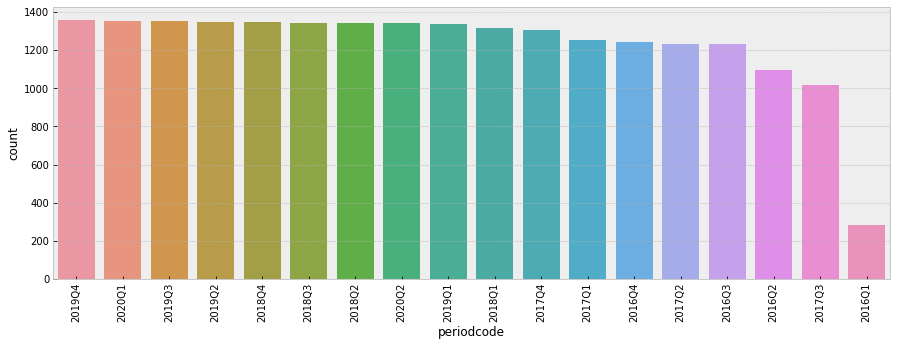

In [ ]:
#Evaluating which yearly quater recorded the highest number of pregnancies 
plt.figure(figsize=(15,5))
sns.countplot(df["periodcode"],order=df['periodcode'].value_counts().index)
plt.xticks(rotation="90")

### 2020 Analysis 

In [ ]:
# create dataframes for the quaters of 2020.
#
yr20 = df[df['year'] == '2020']
q1_2020 = yr20[yr20['periodcode'] == "2020Q1"]
q2_2020 = yr20[yr20['periodcode'] == "2020Q2"]

In [ ]:
# Pregnancies in Quarter one of the year 2020
#
group_q1_2020 = q1_2020.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
group_q1_2020

periodcode  County                
2020Q1      Nairobi County            7741.0
            Kakamega County           3978.0
            Homa Bay County           3611.0
            Narok County              3611.0
            Nakuru County             3590.0
            Bungoma County            3317.0
            Kajiado County            3305.0
            Meru County               3157.0
            Kiambu County             3027.0
            Trans Nzoia County        2922.0
            Kwale County              2740.0
            Migori County             2661.0
            Kericho County            2395.0
            Kisii County              2352.0
            Turkana County            2255.0
            Kilifi County             2205.0
            Bomet County              2180.0
            Siaya County              2139.0
            West Pokot County         2103.0
            Nandi County              1979.0
            Kisumu County             1870.0
            Vihiga C

In [ ]:
# Pregnancies in Quarter two of the year 2020
#
group_q2_2020 = q2_2020.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
group_q2_2020

periodcode  County                
2020Q2      Nairobi County            3094.0
            Kakamega County           3075.0
            Narok County              2904.0
            Meru County               2526.0
            Nakuru County             2456.0
            Bungoma County            2430.0
            Homa Bay County           2430.0
            Trans Nzoia County        2351.0
            Kajiado County            1943.0
            Migori County             1875.0
            Kiambu County             1853.0
            Kisii County              1814.0
            West Pokot County         1687.0
            Siaya County              1598.0
            Bomet County              1571.0
            Turkana County            1446.0
            Kericho County            1411.0
            Kwale County              1406.0
            Nandi County              1357.0
            Kilifi County             1282.0
            Kisumu County             1255.0
            Nyamira 

### 2019 Analysis 

In [ ]:
# create dataframes for the quaters before the year 2019.
#
yr19 = df[df['year'] == '2019']
q1_2019 = yr19[yr19['periodcode'] == "2019Q1"]
q2_2019 = yr19[yr19['periodcode'] == "2019Q2"]
q3_2019 = yr19[yr19['periodcode'] == "2019Q3"]
q4_2019 = yr19[yr19['periodcode'] == "2019Q4"]

In [ ]:
# Pregnancies in Quarter one of the year 2019
#
q1_2019 = q1_2019.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
q1_2019.head()

periodcode  County         
2019Q1      Nairobi County     6060.0
            Kakamega County    4935.0
            Bungoma County     4755.0
            Meru County        4153.0
            Nakuru County      3834.0
Name: adolescent pregnancy, dtype: float64

In [ ]:
# Pregnancies in Quarter two of the year 2019
#
q2_2019 = q2_2019.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
q2_2019.head()

periodcode  County         
2019Q2      Nairobi County     6529.0
            Kakamega County    4584.0
            Nakuru County      4264.0
            Meru County        4063.0
            Narok County       3934.0
Name: adolescent pregnancy, dtype: float64

In [ ]:
# Pregnancies in Quarter three of the year 2019
#
q3_2019 = q3_2019.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
q3_2019.head()

periodcode  County         
2019Q3      Nairobi County     6765.0
            Nakuru County      4517.0
            Kakamega County    4339.0
            Meru County        4276.0
            Narok County       3942.0
Name: adolescent pregnancy, dtype: float64

In [ ]:
# Pregnancies in Quarter four of the year 2019
#
q4_2019 = q4_2019.groupby(['periodcode', 'County'])['adolescent pregnancy'].sum().sort_values(ascending=False)
q4_2019.head()

periodcode  County         
2019Q4      Nairobi County     5415.0
            Nakuru County      3869.0
            Kakamega County    3588.0
            Meru County        3334.0
            Narok County       3156.0
Name: adolescent pregnancy, dtype: float64

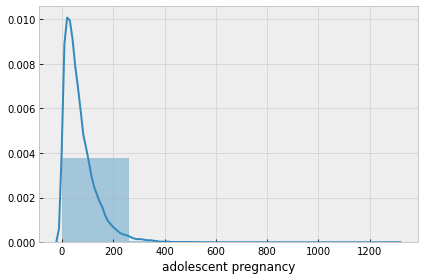

In [ ]:
sns.distplot(df['adolescent pregnancy'], kde=True, bins=5)
plt.tight_layout()

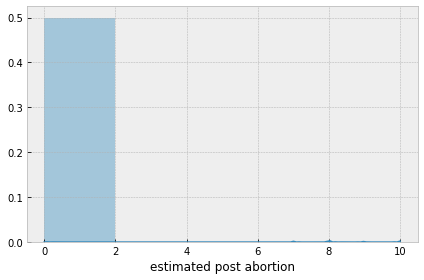

In [ ]:
sns.distplot(df['estimated post abortion'], kde=True, bins=5)
plt.tight_layout()

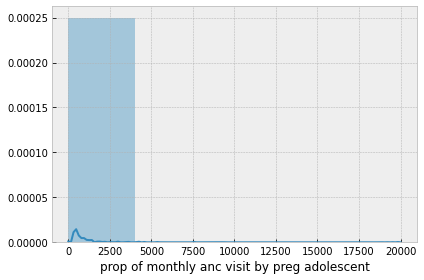

In [ ]:
sns.distplot(df['prop of monthly anc visit by preg adolescent'], kde=True, bins=5)
plt.tight_layout()

### Bivariate Analysis 

In [ ]:
#!pip install --upgrade plotly 

In [ ]:
num_var = df.select_dtypes(include=['float64'])
#Pair plot to show relationships of the variables 
#sns.pairplot(num_var)

### Multivariate Analysis 

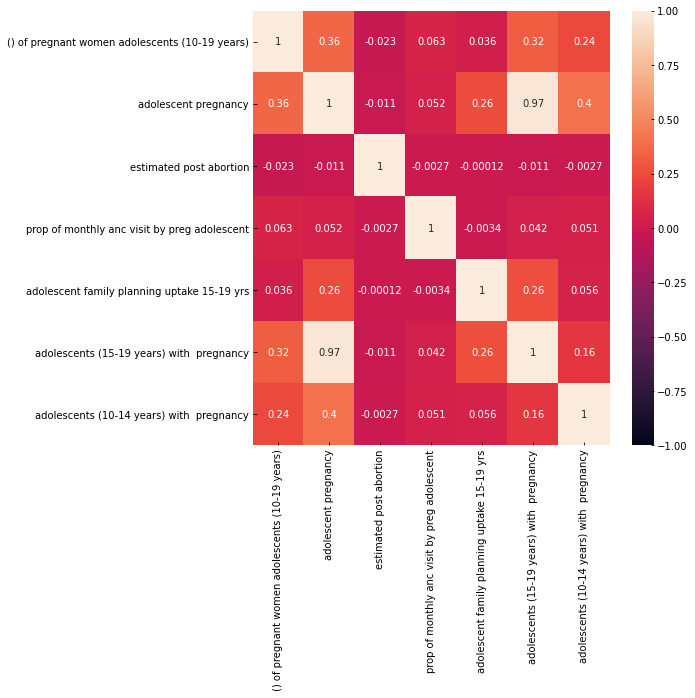

In [ ]:
# Create correlation matrix of numeric variables
pearson_corr = df.corr(method='pearson')

# Plot correlation matrix
plt.figure(figsize=(8,8))
sns.heatmap(pearson_corr, vmin=-1, vmax=1, annot=True)

However, pearson correlation assumes normal correlation which most variables don't have.

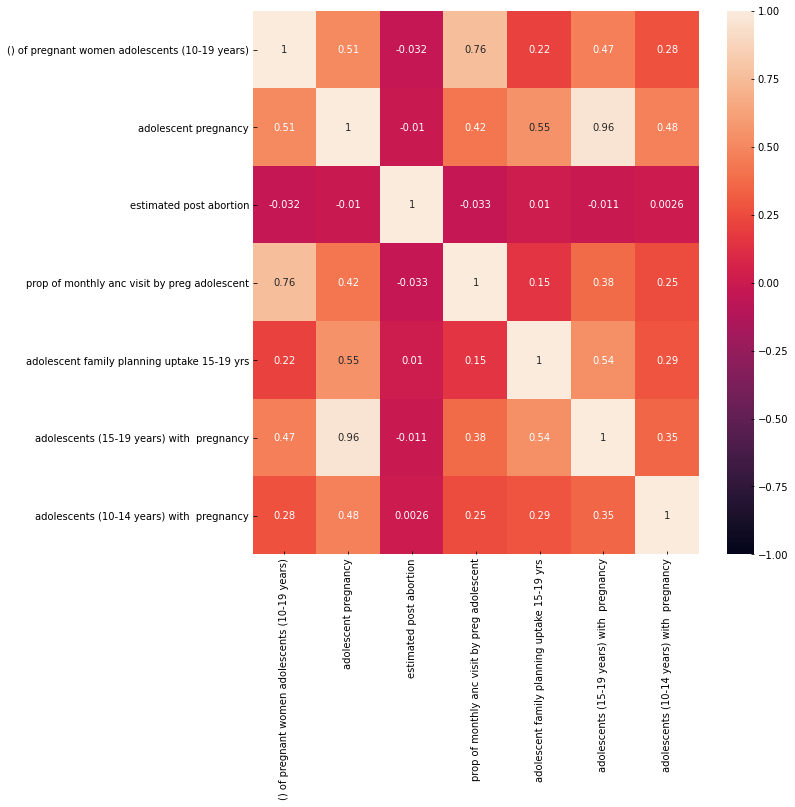

In [ ]:
spearman_corr = df.corr(method='spearman')

# Plot correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(spearman_corr, vmin=-1, vmax=1, annot=True)

### Multicollinearity

In [ ]:
# Test for multicollinearity
vif = pd.DataFrame(np.linalg.inv(spearman_corr), index = spearman_corr.index, columns=spearman_corr.columns)
vif

,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,adolescents (10-14 years) with pregnancy
() of pregnant women adolescents (10-19 years),2.633628,-0.681716,0.020868,-1.740161,0.024519,0.073792,-0.013965
adolescent pregnancy,-0.681716,17.193893,-0.004079,-0.435414,-0.551880,-14.798573,-2.508639
estimated post abortion,0.020868,-0.004079,1.001640,0.020388,-0.018447,0.010686,-0.010060
prop of monthly anc visit by preg adolescent,-1.740161,-0.435414,0.020388,2.394744,0.123748,0.268320,-0.032949
adolescent family planning uptake 15-19 yrs,0.024519,-0.551880,-0.018447,0.123748,1.454002,-0.274533,-0.098301
adolescents (15-19 years) with pregnancy,0.073792,-14.798573,0.010686,0.268320,-0.274533,14.500705,1.925309
adolescents (10-14 years) with pregnancy,-0.013965,-2.508639,-0.010060,-0.032949,-0.098301,1.925309,1.556030


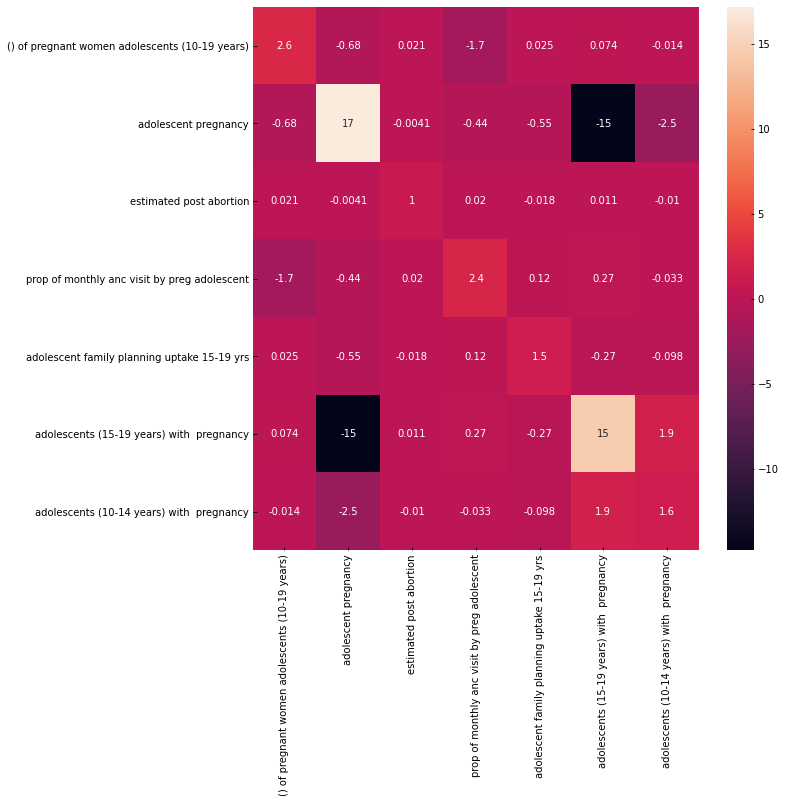

In [ ]:
#multicollinearity heat map 
plt.figure(figsize=(10,10))
sns.heatmap(vif, annot=True)

No multicollinearity among variables

In [ ]:
#sum of teenage pregancies in comparison to othe counties highest versus the lowest numbers 
county_df = df.groupby(['County']).sum()

# Visualize most popular county.
#
county_df.style.highlight_max(color='green').highlight_min(color='red')

,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,adolescents (10-14 years) with pregnancy
County,,,,,,,
Baringo County,12757.000000,20293.000000,0.000000,34146.000000,7179.000000,17543.000000,2750.000000
Bomet County,18047.000000,41483.000000,0.000000,13299.000000,25794.000000,40158.000000,1325.000000
Bungoma County,24029.000000,64948.000000,0.000000,10146.000000,49123.000000,61470.000000,3478.000000
Busia County,23974.000000,40864.000000,0.000000,13335.000000,34793.000000,40023.000000,841.000000
Elgeyo Marakwet County,9581.000000,15445.000000,0.000000,4569.000000,8590.000000,15139.000000,306.000000
Embu County,7010.000000,10399.000000,0.000000,3650.000000,9825.000000,10087.000000,312.000000
Garissa County,4320.000000,13483.000000,0.000000,3090.000000,3083.000000,11617.000000,1866.000000
Homa Bay County,28186.000000,60293.000000,0.000000,12784.000000,73642.000000,55908.000000,4385.000000
Isiolo County,5847.000000,9659.000000,0.000000,3979.000000,3628.000000,9495.000000,164.000000


### Feature Engineering 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22111 entries, 1 to 27723
Data columns (total 17 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   periodcode                                      22111 non-null  object 
 1   Country                                         22111 non-null  object 
 2   County                                          22111 non-null  object 
 3   Sub_County                                      22111 non-null  object 
 4   Ward                                            22111 non-null  object 
 5   organisationunitid                              22111 non-null  object 
 6   organisationunitname                            22111 non-null  object 
 7   organisationunitcode                            22111 non-null  object 
 8   () of pregnant women adolescents (10-19 years)  22111 non-null  float64
 9   adolescent pregnancy                   

In [ ]:
# Identify categorical columns and create a list of them
#
categorical = df.dtypes == object
categorical_cols = df.columns[categorical].tolist()
print(f"Categorical columns are: \n{categorical_cols}")

Categorical columns are: 
['periodcode', 'Country', 'County', 'Sub_County', 'Ward', 'organisationunitid', 'organisationunitname', 'organisationunitcode', 'month_period', 'year']


In [ ]:
# Instantiate labelencoder
#
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
cat = df.select_dtypes(include=['object']).columns.to_list()

for col in cat:
    df[col] = pd.get_dummies(df[col])
    
df.head()

,periodcode,Country,County,Sub_County,Ward,organisationunitid,organisationunitname,organisationunitcode,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,month_period,year,adolescents (10-14 years) with pregnancy
1,0,1,0,0,0,0,0,0,48.0,161.0,0.0,16.0,14.0,160.0,0,0,1.0
2,0,1,0,0,0,0,0,0,43.0,20.0,0.0,667.0,23.0,17.0,0,0,3.0
3,0,1,0,0,0,0,0,0,21.0,29.0,0.0,26.0,24.0,28.0,0,0,1.0
4,0,1,0,0,0,0,0,0,11.0,34.0,0.0,26.0,7.0,33.0,0,0,1.0
6,0,1,0,0,0,0,0,0,20.0,136.0,0.0,10.0,87.0,128.0,0,0,8.0


In [ ]:
# Perform univariate analysis on the numeric variables
num_var = df.select_dtypes(include=['float64','int64']).columns.to_list()
num_var = df[num_var]
num_var.head(3)

,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,adolescents (10-14 years) with pregnancy
1,48.0,161.0,0.0,16.0,14.0,160.0,1.0
2,43.0,20.0,0.0,667.0,23.0,17.0,3.0
3,21.0,29.0,0.0,26.0,24.0,28.0,1.0


The column "orgunitlevel1" only has zeros hence it will not be useful for building our model. Therefore we are going to drop that column.

In [ ]:
df = df.drop(['periodcode', 'Country'], axis=1)
df.head()

,County,Sub_County,Ward,organisationunitid,organisationunitname,organisationunitcode,() of pregnant women adolescents (10-19 years),adolescent pregnancy,estimated post abortion,prop of monthly anc visit by preg adolescent,adolescent family planning uptake 15-19 yrs,adolescents (15-19 years) with pregnancy,month_period,year,adolescents (10-14 years) with pregnancy
1,0,0,0,0,0,0,48.0,161.0,0.0,16.0,14.0,160.0,0,0,1.0
2,0,0,0,0,0,0,43.0,20.0,0.0,667.0,23.0,17.0,0,0,3.0
3,0,0,0,0,0,0,21.0,29.0,0.0,26.0,24.0,28.0,0,0,1.0
4,0,0,0,0,0,0,11.0,34.0,0.0,26.0,7.0,33.0,0,0,1.0
6,0,0,0,0,0,0,20.0,136.0,0.0,10.0,87.0,128.0,0,0,8.0


## Implementing the Solution

### KNeighbors

Importing our Machine Learning libraries 

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# Importing the Decision tree classifier from the sklearn library.
#
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)

sc = StandardScaler()

X = df.drop(['adolescent pregnancy'], axis=1)
y = df['adolescent pregnancy']
X.shape, y.shape

((22111, 14), (22111,))

In [ ]:
# Split the data into Train and Test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [ ]:
y_pred_knn = knn.predict(X_test)
print(y_pred_knn)

[ 55.33333333  45.          25.33333333 ...   6.          15.33333333
 125.66666667]


In [ ]:
# RMSE.
from sklearn import metrics

print(f"RMSE is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn))}")
print(f"R2 Score is: {round(metrics.r2_score(y_test, y_pred_knn)*100, 3)}%")

RMSE is: 12.942537706610514
R2 Score is: 96.381%


### Random Forest

In [ ]:
# Importing the Decision tree classifier from the sklearn library.
#
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=10, random_state=0)

sc = StandardScaler()

X = df.drop(['adolescent pregnancy'], axis=1)
y = df['adolescent pregnancy']
X.shape, y.shape

((22111, 14), (22111,))

In [ ]:
# Split the data into Train and Test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred_forest = forest.predict(X_test)
print(y_pred_forest)

[ 37.2  51.   23.  ...   5.   16.  124.9]


In [ ]:
# RMSE
from sklearn import metrics

print(f"RMSE is: {np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest))}")
print(f"R2 Score is: {round(metrics.r2_score(y_test, y_pred_forest)*100, 3)}%")

RMSE is: 9.541360159672521
R2 Score is: 98.033%


#### Challenging the Solution


1.   Did we have enough data?




> The data provide was enough for our model.


2.   Was the data appropriate for the problem?



> The data provided was app appropriate for solving the problem at hand.



3.   Do we require additional data?




> We might need additional data e.g. family planning between the ages 10-14.


